In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import heapq as hq
import graphviz as gv
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
from algorithmic_complexity.aclib import graphstuff as gs

base = "https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/"
csv = "poblaciones.csv"
DATA_SET = pd.read_csv(f"{base}{csv}")

def calcularDistancia(cp1,cp2):
    la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
    la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
    
    lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
    dlo = lo2 - lo1
    dla = la2 - la1
    a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371

    return round(c * r, 2)

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 268, done.
remote: Counting objects: 100% (268/268), done.
remote: Compressing objects: 100% (263/263), done.
remote: Total 268 (delta 150), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (268/268), 274.11 KiB | 7.83 MiB/s, done.
Resolving deltas: 100% (150/150), done.


In [ ]:
def nxAgv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered'}, nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G', strict=True)
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

 
    
  for u, v in G.edges():
    #print(v,path[v], path)
    pp = {} if path and path[v] == u else {}

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)
  for u in range(len(path)-1):
    v = u+1
    pp = pathparams
    g.edge(str(path[u]), str(path[v]), f"{G.edges[path[u], path[v]]['weight']}", **pp)       

  return g

In [ ]:
def Area_Estudio(DATA_SET, Nom_Provinci, Nom_Distrito):

    list_Provincia = DATA_SET['PROVINCIA'].unique() #no repetir

    Provincia = dict()

    for i, nom1 in enumerate(list_Provincia):
        Provincia[nom1] = DATA_SET[DATA_SET['PROVINCIA'] == nom1]

    #---#

    list_Distrito = Provincia[Nom_Provinci]['DISTRITO'].unique()

    Distrito = dict()

    for j, nom2 in enumerate(list_Distrito):
        Distrito[nom2] = Provincia[Nom_Provinci][Provincia[Nom_Provinci]['DISTRITO'] == nom2]
    
    CentrosPoblados = Distrito[Nom_Distrito]
    #--#
    return CentrosPoblados

In [ ]:
def Area_Estudio_Mayor(DATA_SET, Nom_Provinci):

    list_Provincia = DATA_SET['PROVINCIA'].unique() #no repetir

    Provincia = dict()

    for i, nom1 in enumerate(list_Provincia):
        Provincia[nom1] = DATA_SET[DATA_SET['PROVINCIA'] == nom1]

    #---#
 
    CentrosPoblados = Provincia[Nom_Provinci]
    #--#
    return CentrosPoblados

In [ ]:
Zona = Area_Estudio(DATA_SET,'CHICLAYO', 'OYOTUN')
Zona2 = Area_Estudio_Mayor(DATA_SET,'UTCUBAMBA')
ZonaV3 = Area_Estudio(DATA_SET,'UTCUBAMBA', 'LONYA GRANDE') #CP

In [ ]:
def Gra(cp1, cp2, x):
  G = nx.Graph()
  indice = cp1.index[0] 
  for i, cp1 in x.iterrows():
    G.add_node(i-indice)

  for i, cp1 in x.iterrows():
    for j, cp2 in x.iterrows():
        if cp1['CENTRO POBLADO'] != cp2['CENTRO POBLADO']:     
            G.add_edge(i - indice, j - indice, weight =round(calcularDistancia(cp1, cp2), 2))
  
  return G

In [ ]:
G = Gra(ZonaV3, ZonaV3, ZonaV3)

In [ ]:
def _BFS(G, s, rq):
  q = [s]
  G.nodes[s]['visited'] = True
  rq.append(s)
  while q:
    minx = (-1,111111)
    v = q.pop(0)
    for w in G.neighbors(v):
      if G.nodes[w]['visited'] is not True:
        minx = (w, min(G.edges[v,w]['weight'], minx[1])) if minx[1] > G.edges[v,w]['weight'] else minx
    if minx[0] != -1 and G.nodes[minx[0]]['visited'] != True:
      q.append(minx[0])
      G.nodes[minx[0]]['visited'] = True
      rq.append(minx[0])

print()
def BFS(G, s):
  rq = []
  for n in G.nodes:
    G.nodes[n]['visited'] = False
  _BFS(G,s, rq)
  return  rq

[0, 4, 2, 3, 1]


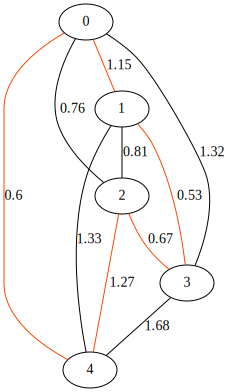

In [ ]:
print(BFS(G, 0))
arr = BFS(G, 0)
arr.append(0)
nxAgv(G, path=arr, weighted=True, params={'size':'15'})